In [22]:
%pip install numpy pandas matplotlib seaborn ipython jupyterlab tensorflow scikit-learn fastdtw tslearn

     -------------------------------------- 358.2/358.2 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 19.6 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 27.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Clustering Model

Creating a clustering model for offensive player trajectories to capture common routes. This notebook uses K Means and Agglomerative models for clustering.

In [1]:
import numpy as np

# load offensive player sequences
o_player_sequences, _ = np.load("trajectories.npy",allow_pickle=True)

In [110]:
import tensorflow as tf

# get the x and y features of the route 2D arrays
o_player_dense= []
for seq in o_player_sequences:
    new_seq = [np.array([x[0],x[1]]) for x in seq]
    o_player_dense.append(np.array(new_seq))
# cast to numpy array
o_player_dense = np.array(o_player_dense,dtype=object)

# pad the sequences so they are all equal length
padding_value = [0,0]
padded_o_seq = tf.keras.preprocessing.sequence.pad_sequences(o_player_dense,padding='post', value=padding_value, dtype='float32',maxlen = 90)


In [111]:
print(o_player_dense.shape)

(17187,)


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

# define k value 
K = 16
# convert the padded sequences to a time series dataset
o_player_dense_transformed = to_time_series_dataset(padded_o_seq)
# Use time series K Means model for clustering
model = TimeSeriesKMeans(n_clusters=K, verbose=False, random_state=0,n_jobs=-1,init='random')
# fit model on padded and casted data
model.fit(o_player_dense_transformed)


TimeSeriesKMeans(init='random', n_clusters=16, n_jobs=-1, random_state=0,
                 verbose=False)

In [164]:
from tslearn.utils import to_time_series

# extract cluster centers
cluster_centers = model.cluster_centers_
cluster_centers = to_time_series(cluster_centers)
cluster_centers.shape

(16, 90, 2)

In [165]:
from sklearn.metrics.pairwise import euclidean_distances

# get the distances and labels of the model using the player data
distances = model.transform(o_player_dense_transformed)
cluster_labels = model.predict(o_player_dense_transformed)

print(distances[0])
print(cluster_labels[0])
sequences_ordered = [[] for i in range(K)]
# getting the sequences for each cluster center ordered from closest to farthest away from each centered
for i in range(len(distances)):
    closest_center = cluster_labels[i]
    distance = distances[i][closest_center]
    sequences_ordered[closest_center].append((distance,i))

# sorting the sequences of each cluster center
for i in range(len(sequences_ordered)):
    lst = sequences_ordered[i]
    lst = sorted(lst)
    sequences_ordered[i] = lst




[ 55.92777726  36.68581273  20.96228887  55.80738807  46.77516491
  55.13722642  74.48219029  91.46284267  86.32065824 122.21075413
 142.39269354  70.66868145  27.27135793  40.07642776  40.1677714
  44.25165629]
2


In [166]:
print(len(sequences_ordered[0]))
print(len(sequences_ordered[1]))


1787
1630


Drawing out top 5 examples for cluster center 0
(6.745811887611245, 10951)


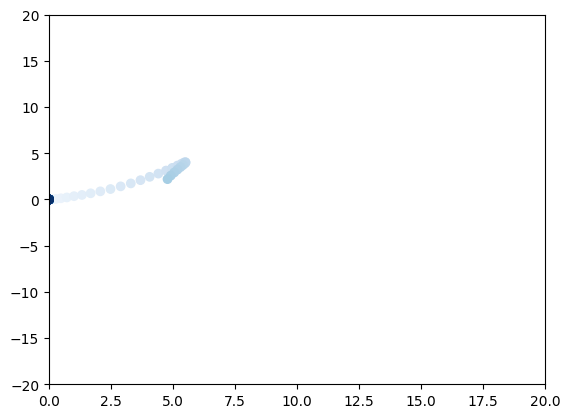

(7.176575042725807, 14122)


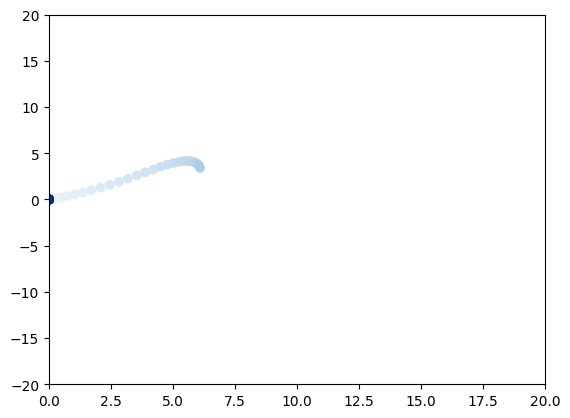

(7.232476690350187, 1016)


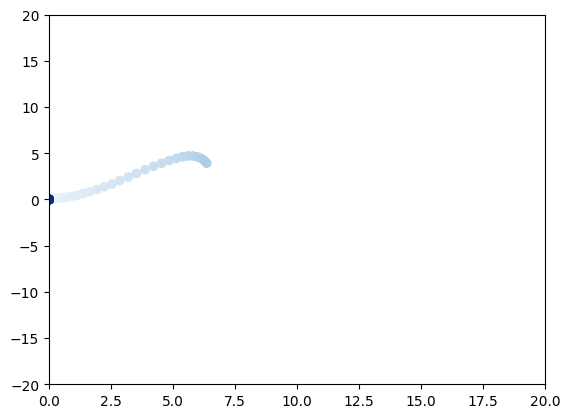

(7.321144760336947, 10091)


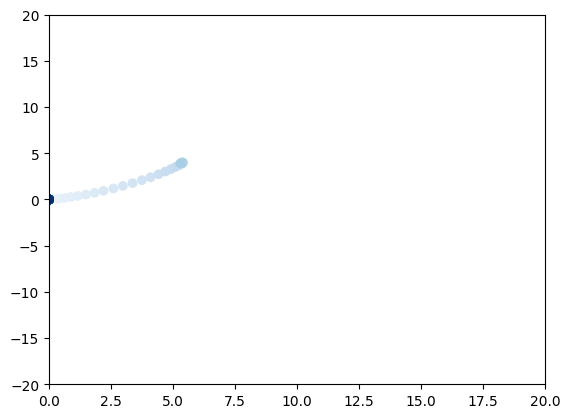

(7.3717420998328285, 17008)


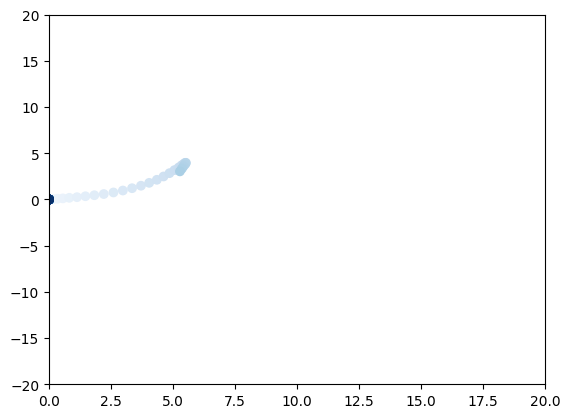

Drawing out top 5 examples for cluster center 1
(7.378774026233484, 16687)


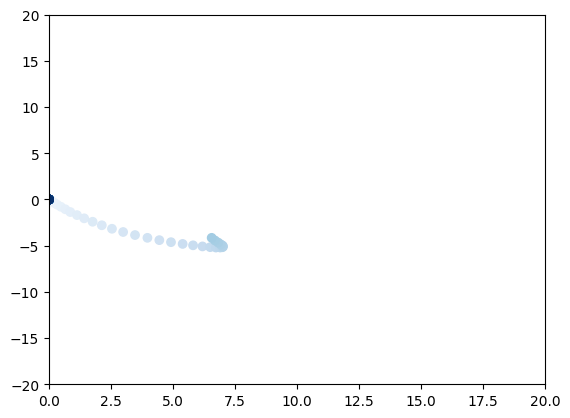

(7.548050234122127, 135)


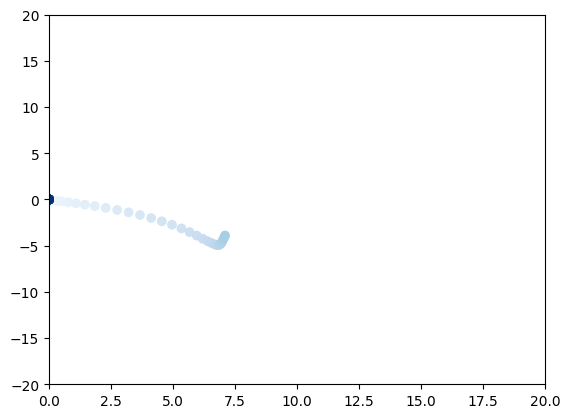

(7.741245737170332, 12536)


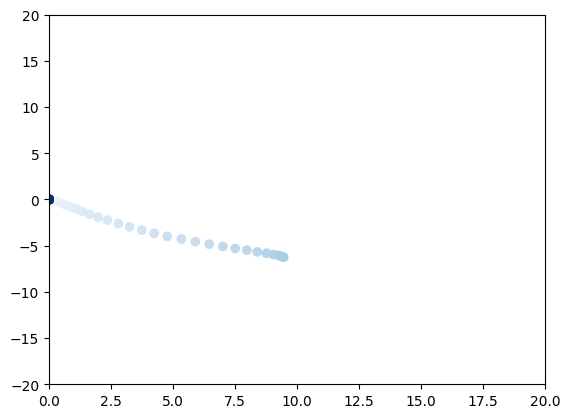

(7.846724716284783, 10631)


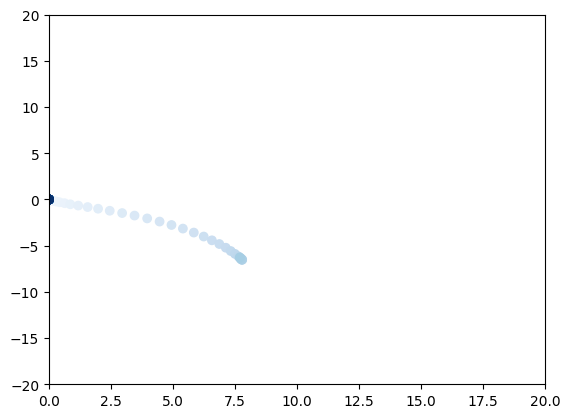

(7.850061819864167, 15259)


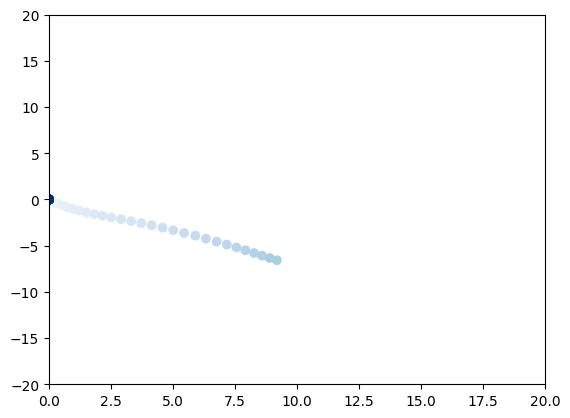

Drawing out top 5 examples for cluster center 2
(9.579238383916692, 7437)


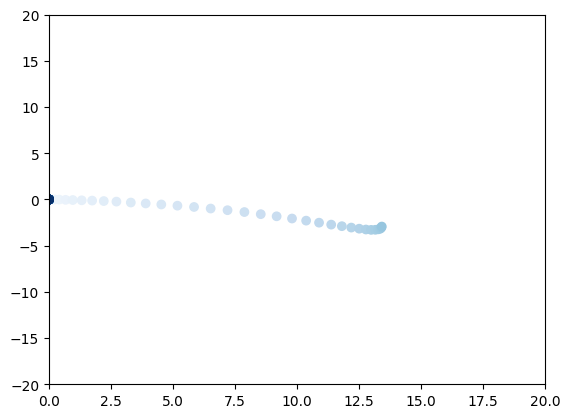

(9.722963294745432, 5322)


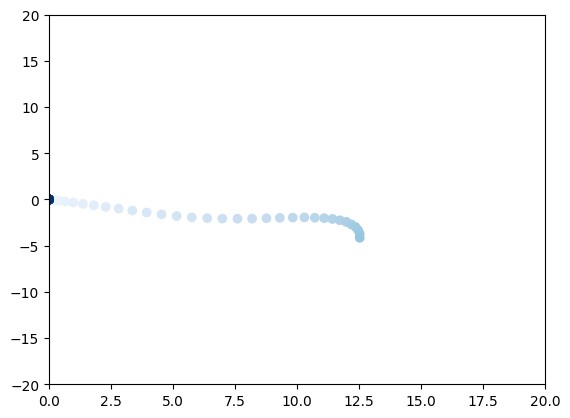

(9.745894738671321, 11843)


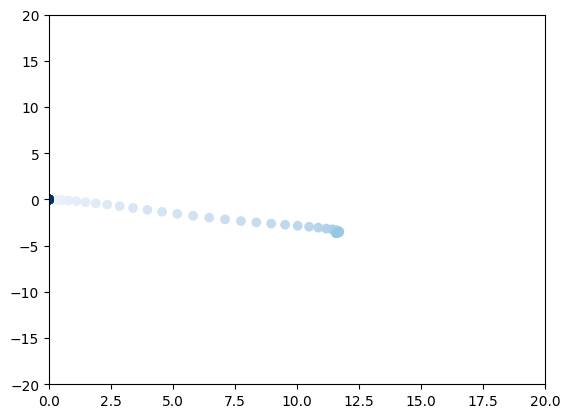

(9.780250916731593, 11936)


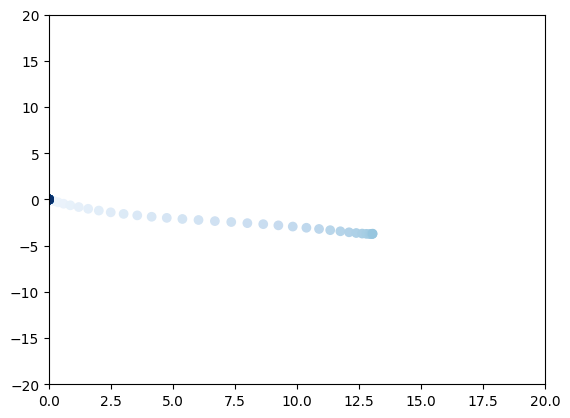

(10.36685872929986, 9150)


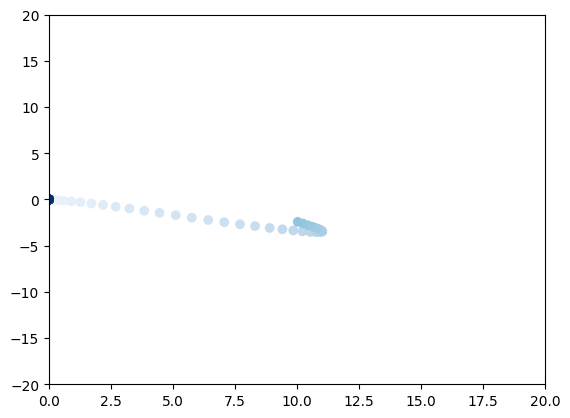

Drawing out top 5 examples for cluster center 3
(3.5398854157988544, 1796)


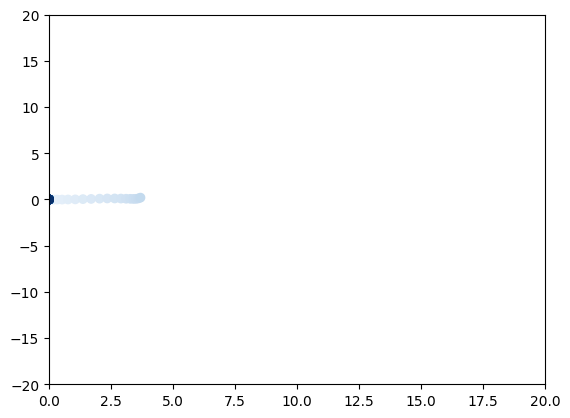

(3.540685107294212, 10133)


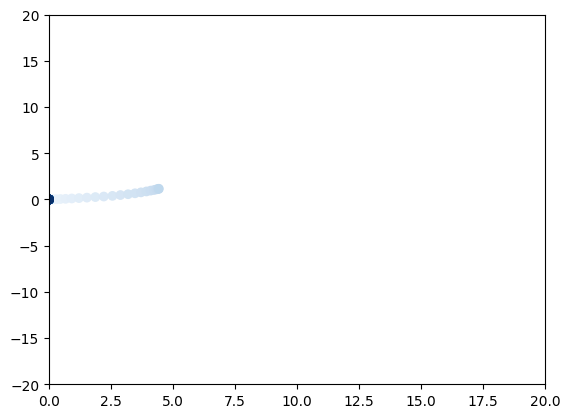

(3.54530920005257, 2538)


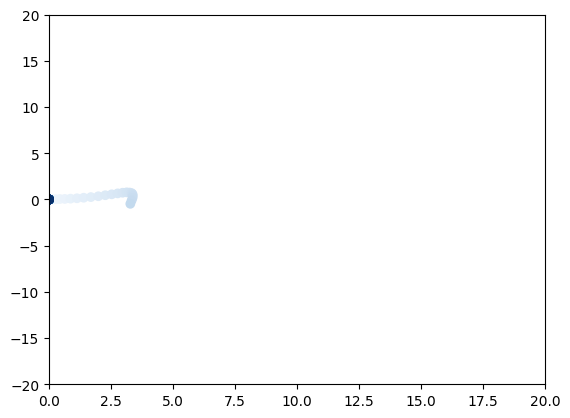

(3.805896641675029, 906)


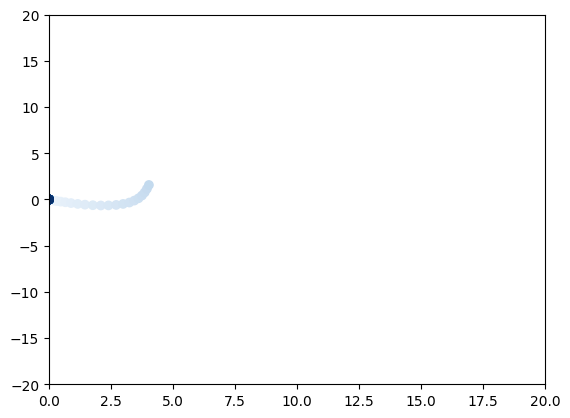

(3.886480922196031, 9336)


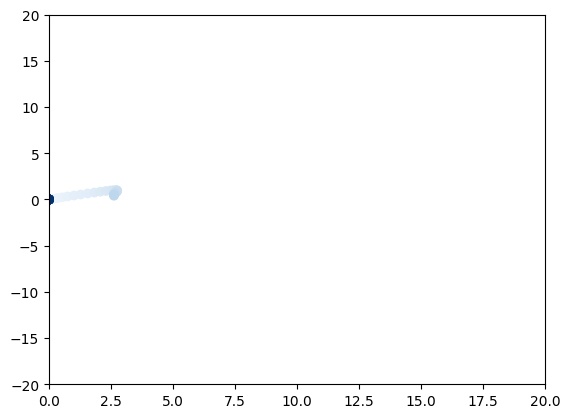

Drawing out top 5 examples for cluster center 4
(4.9414198060575725, 7212)


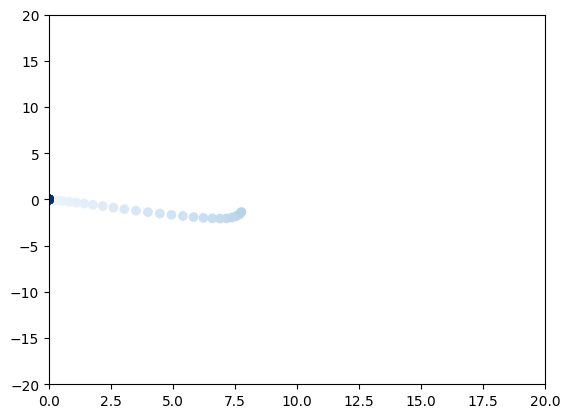

(5.1890975677815625, 5829)


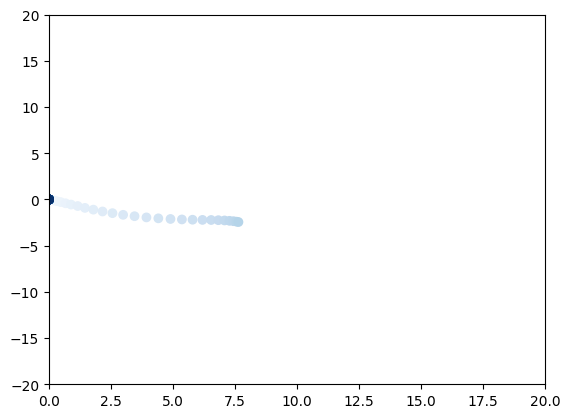

(5.262032572932902, 3692)


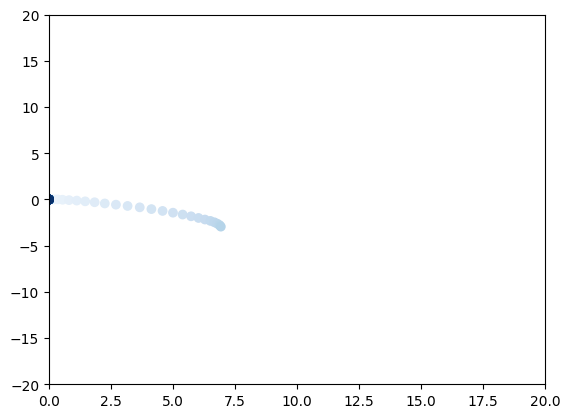

(5.357424047402677, 12237)


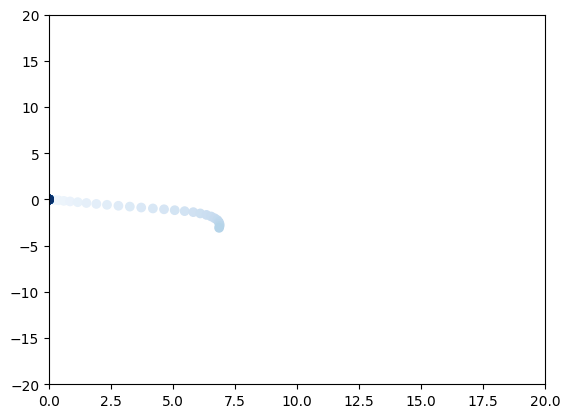

(5.557615777162807, 5774)


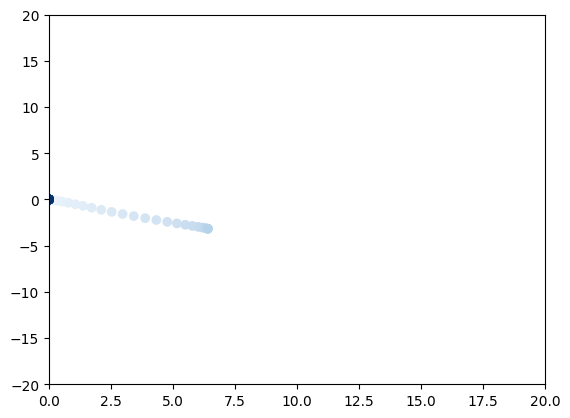

Drawing out top 5 examples for cluster center 5
(17.194141630744458, 6980)


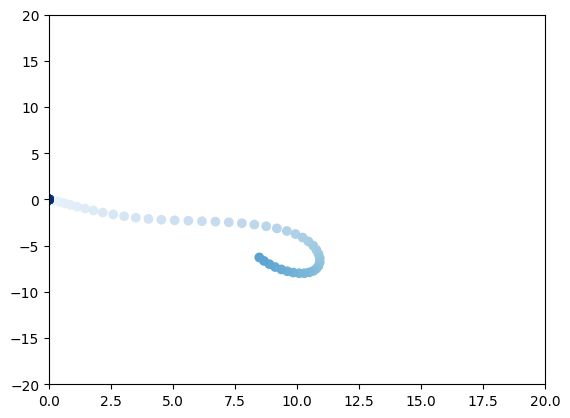

(17.996747190242424, 14862)


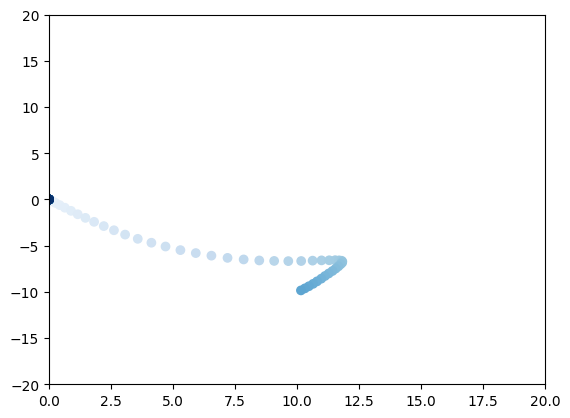

(18.82544681436098, 15267)


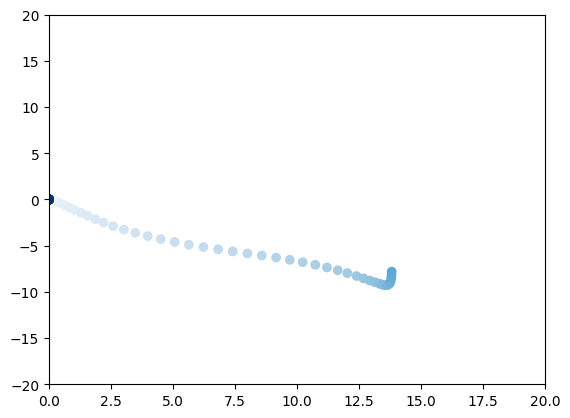

(19.77783759591488, 6762)


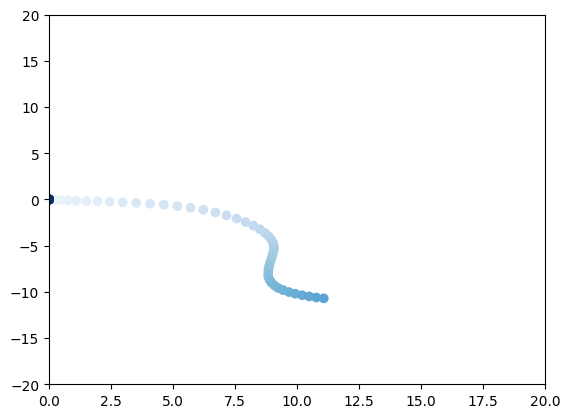

(20.1295469976091, 4094)


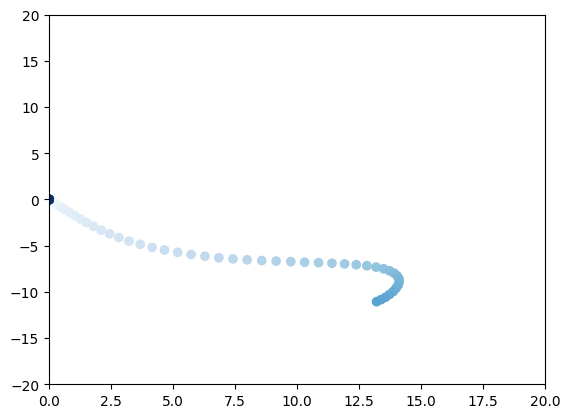

Drawing out top 5 examples for cluster center 6
(19.358698157077157, 14691)


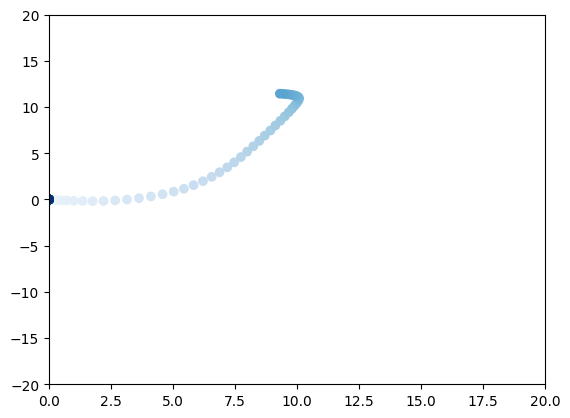

(20.27177576132652, 6979)


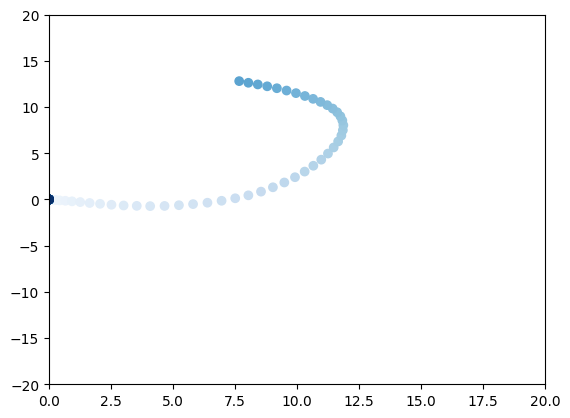

(20.32695195204128, 2614)


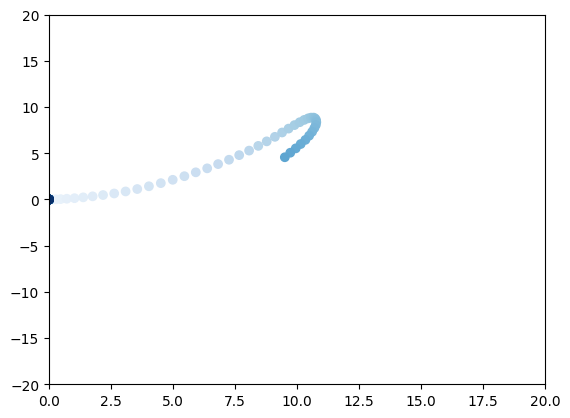

(20.49404380054538, 11747)


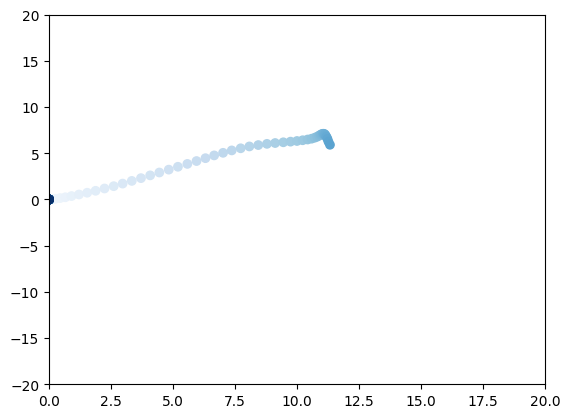

(20.831435119416227, 7845)


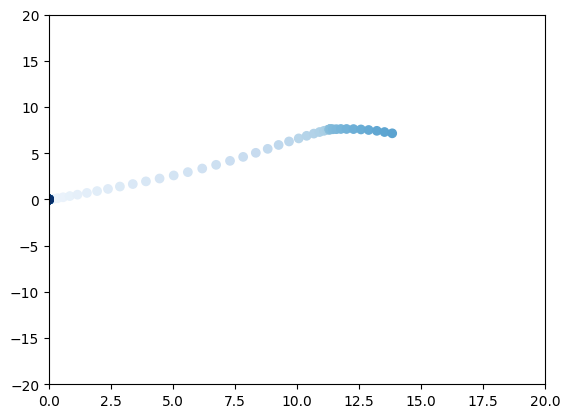

Drawing out top 5 examples for cluster center 7
(27.258908750445947, 3267)


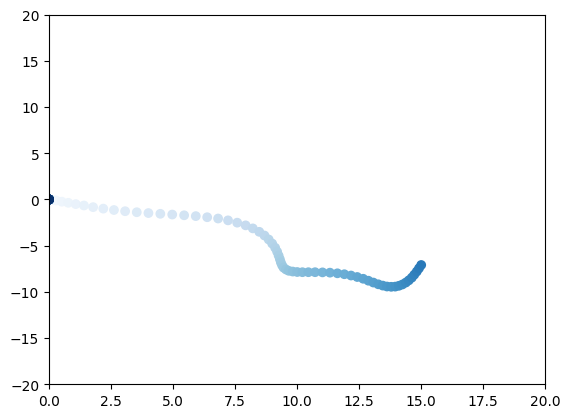

(28.401940783823278, 4912)


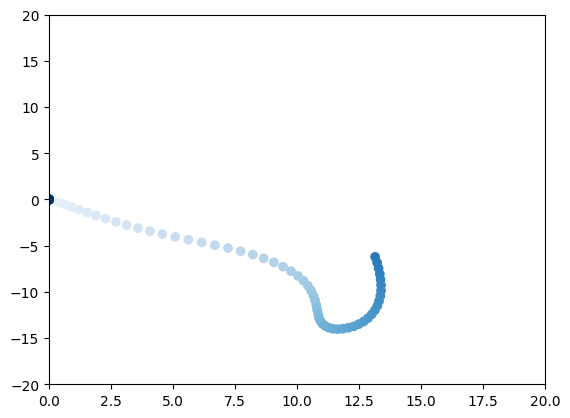

(30.52988542123793, 12958)


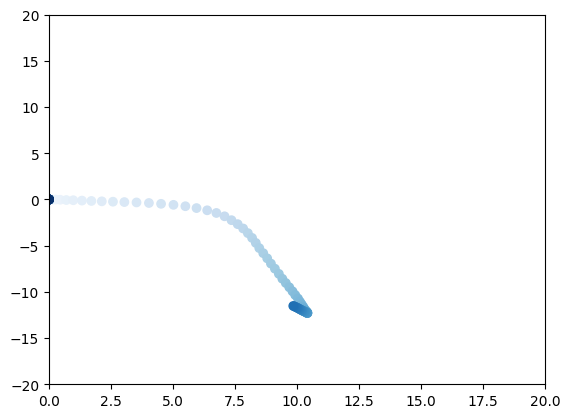

(30.674556455310885, 9986)


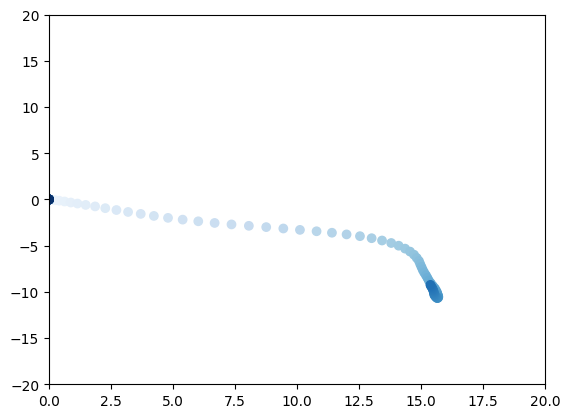

(30.82736106432646, 8078)


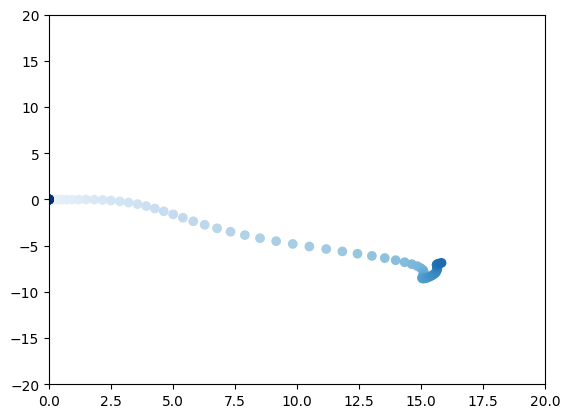

Drawing out top 5 examples for cluster center 8
(22.9914226893311, 14248)


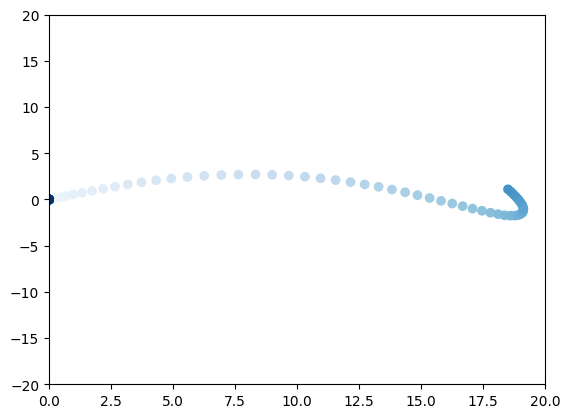

(24.86393732467783, 15685)


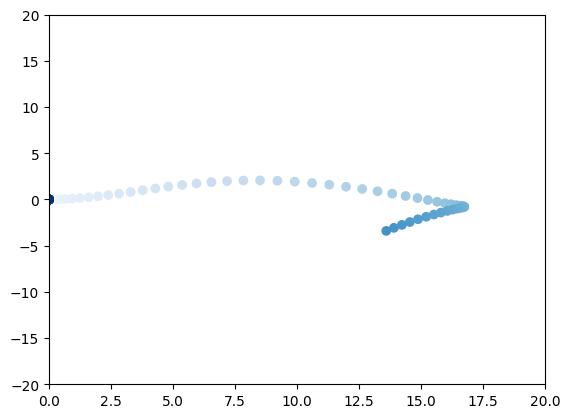

(24.9448318230665, 3521)


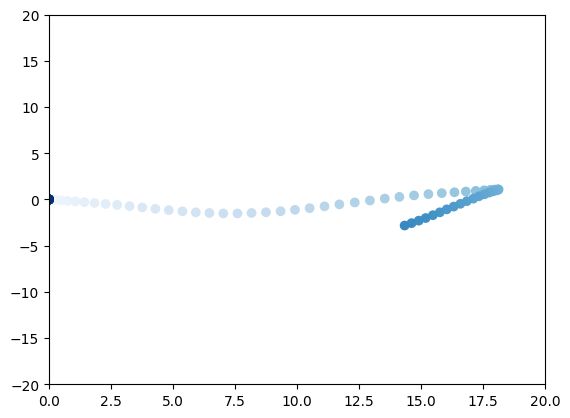

(26.631342217275677, 4872)


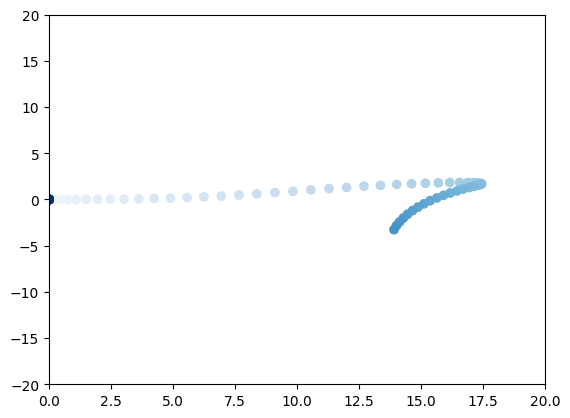

(26.66615629313356, 4363)


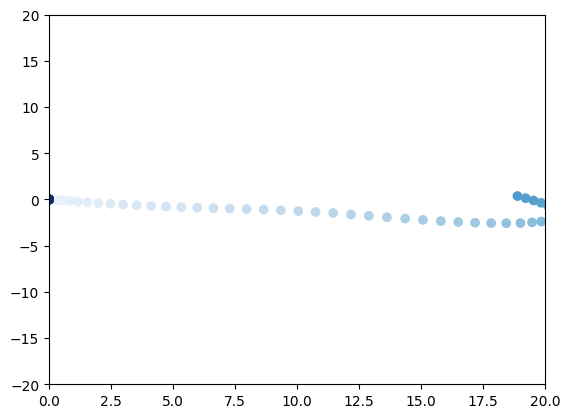

Drawing out top 5 examples for cluster center 9
(29.800143962256126, 9509)


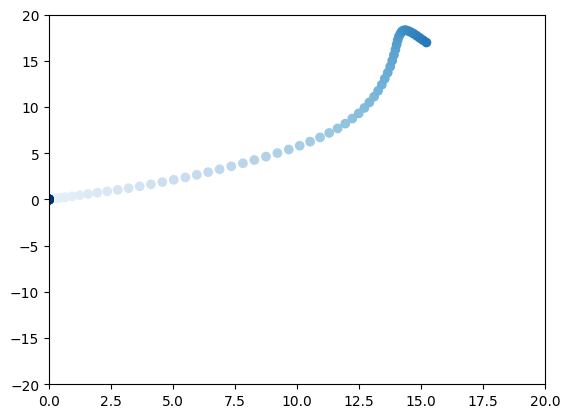

(32.018806519055374, 4795)


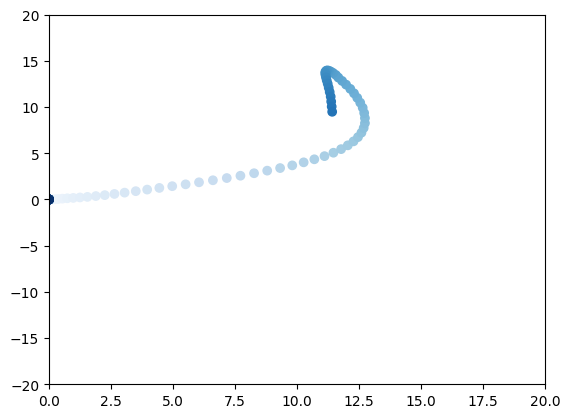

(35.43226687738666, 9987)


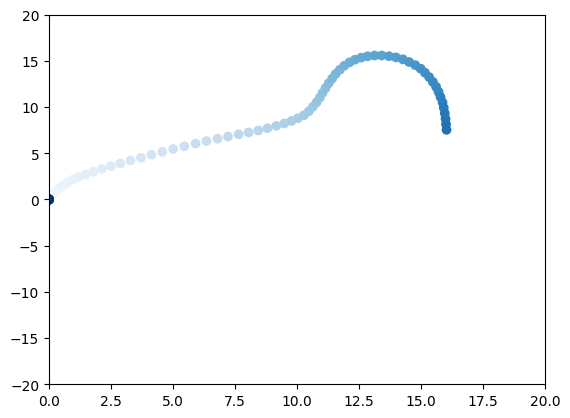

(37.2825020682634, 13159)


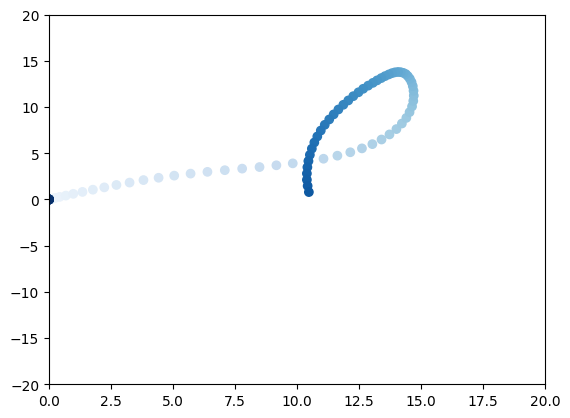

(38.77608779893929, 2433)


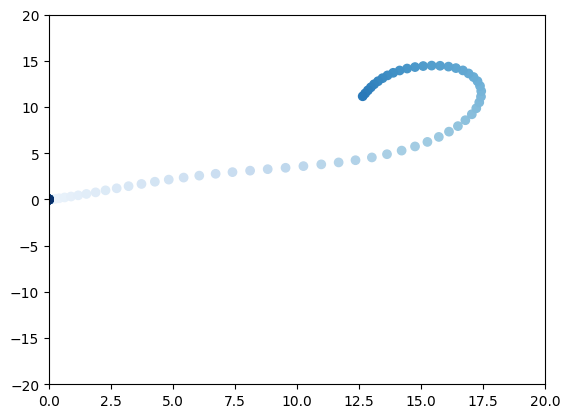

Drawing out top 5 examples for cluster center 10
(44.05029524840166, 7065)


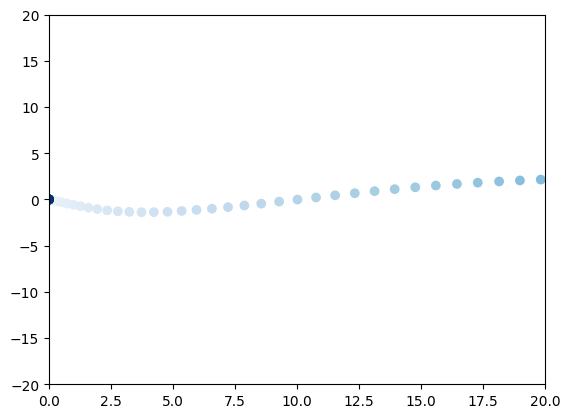

(49.78207207002566, 777)


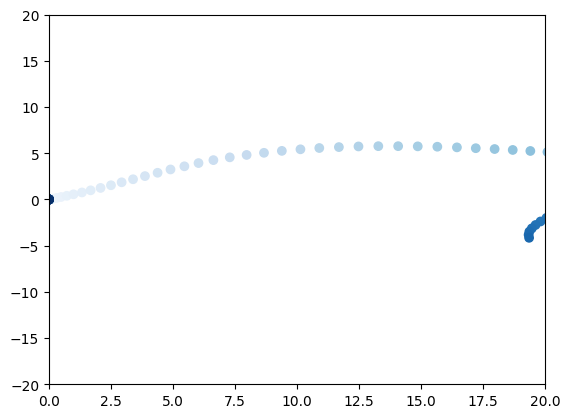

(53.257730195731426, 8099)


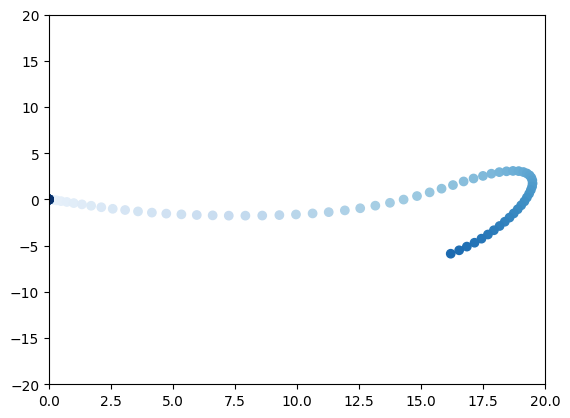

(54.17821283145313, 776)


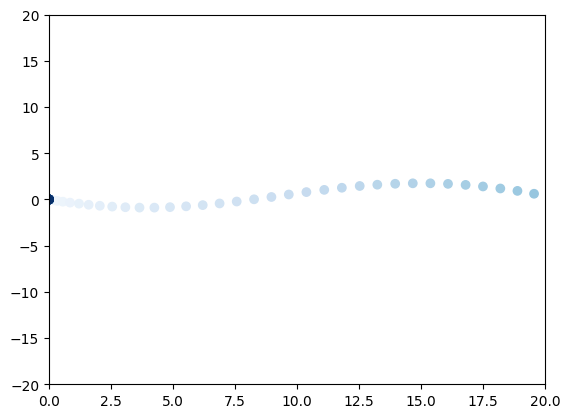

(55.16664372905171, 903)


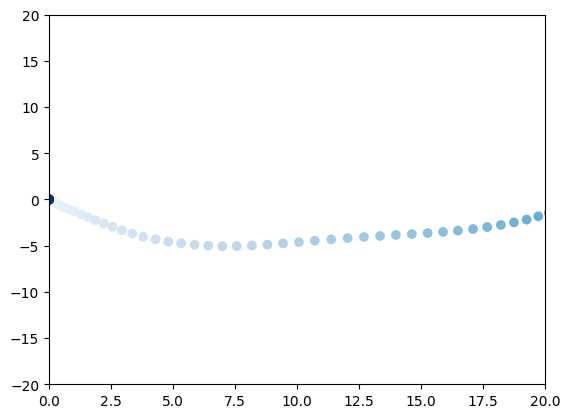

Drawing out top 5 examples for cluster center 11
(11.925888667329716, 11863)


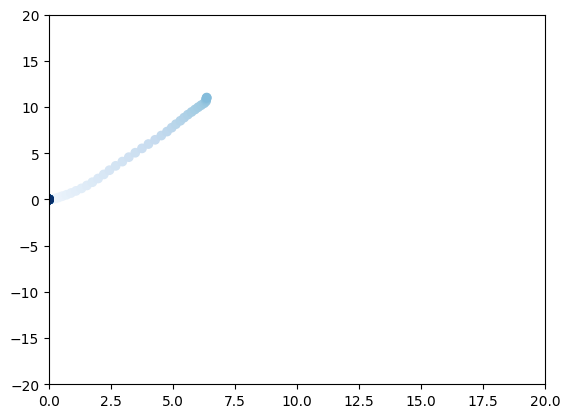

(12.387738353893237, 9933)


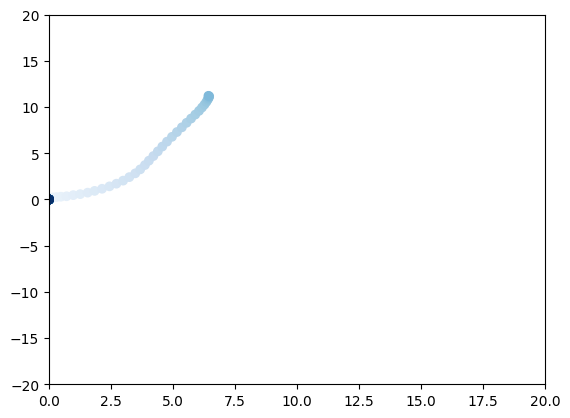

(13.764216099549886, 13375)


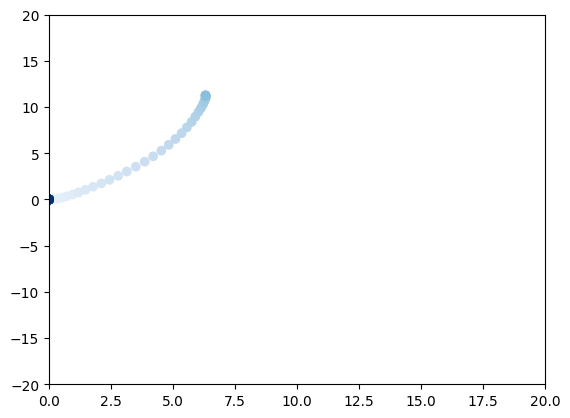

(14.717264344932955, 16700)


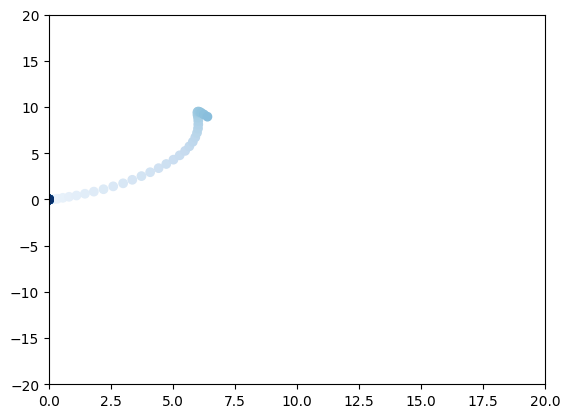

(14.86890788806102, 7556)


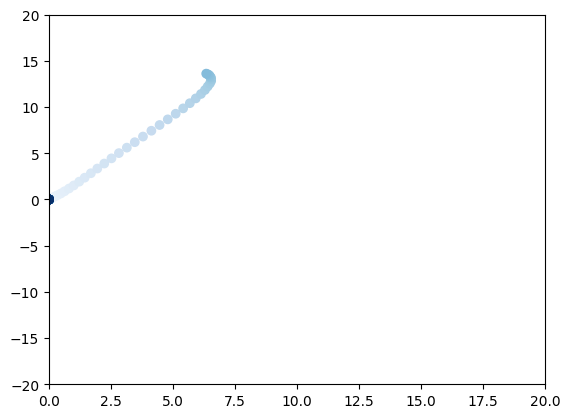

Drawing out top 5 examples for cluster center 12
(11.349919144005732, 12620)


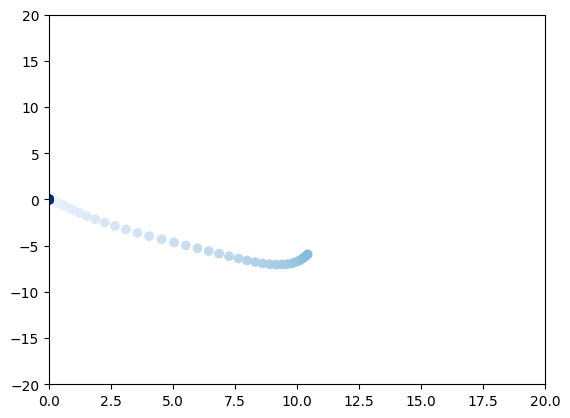

(11.953369086536549, 8613)


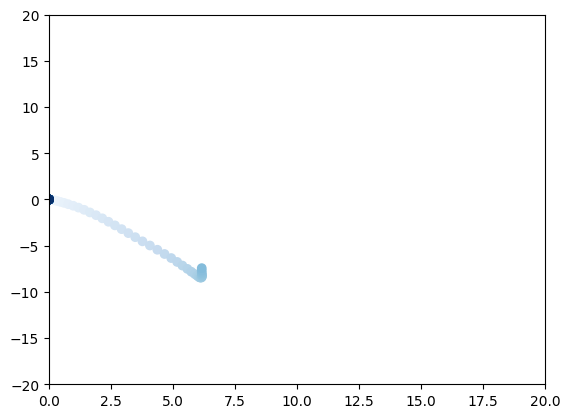

(13.283581083621858, 3440)


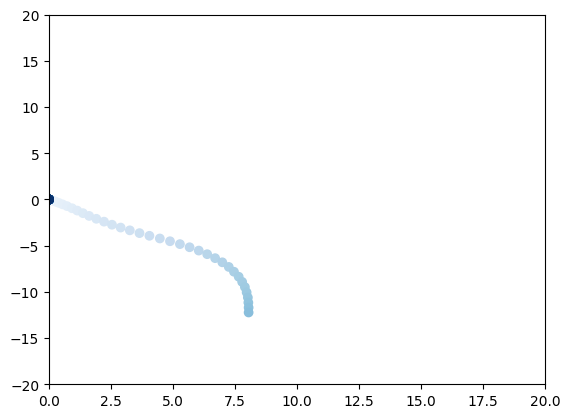

(13.532105768757914, 14736)


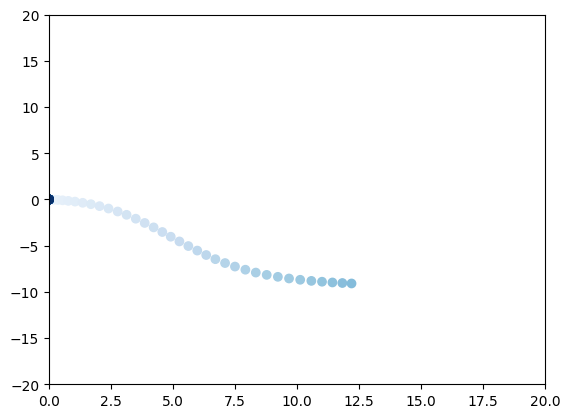

(13.677312641538961, 12357)


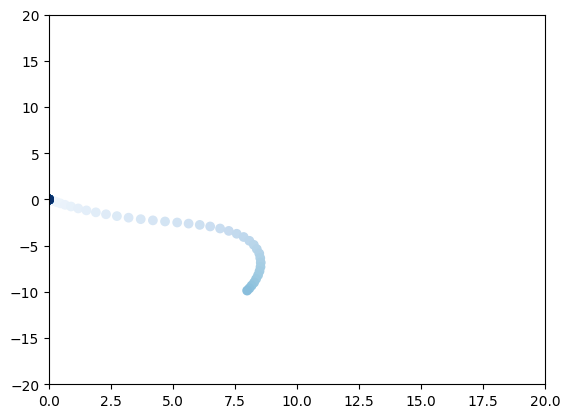

Drawing out top 5 examples for cluster center 13
(7.738463663080262, 13529)


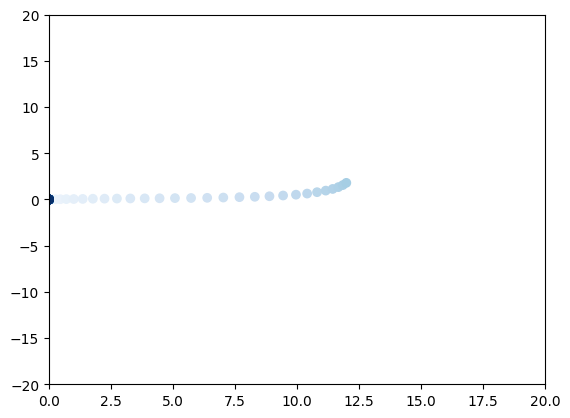

(7.840716640172435, 13043)


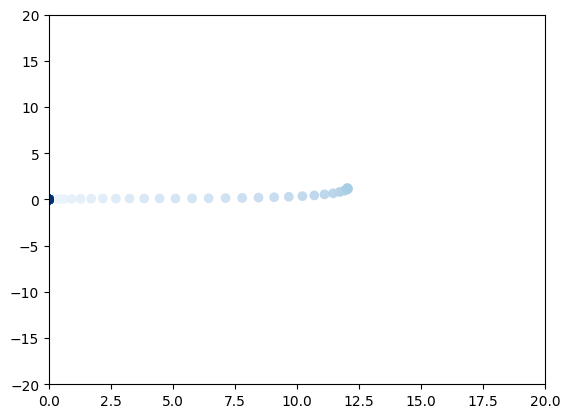

(8.11838426901374, 10984)


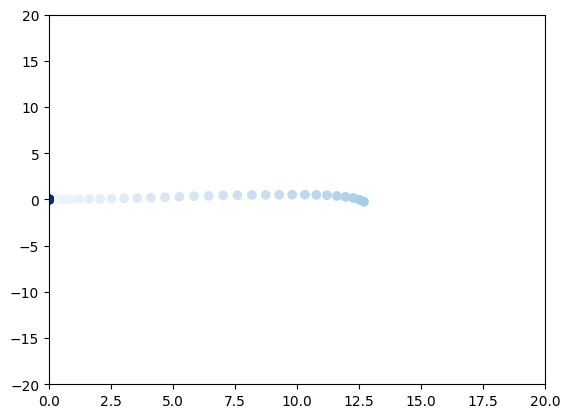

(8.199717890242491, 13907)


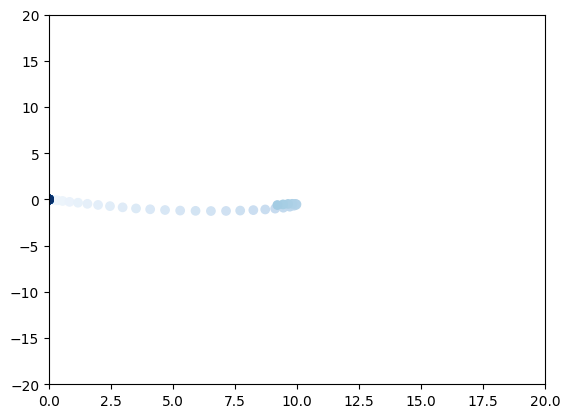

(8.200970654868943, 3771)


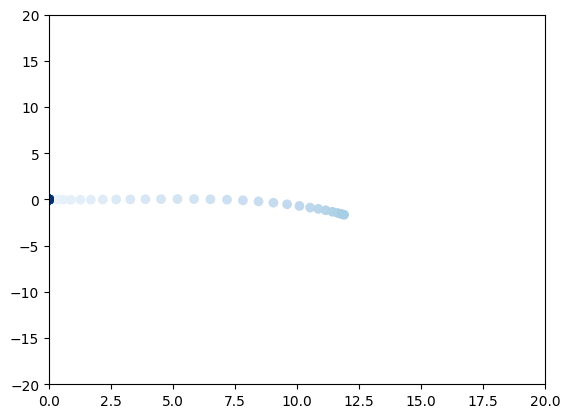

Drawing out top 5 examples for cluster center 14
(9.774381126142323, 2442)


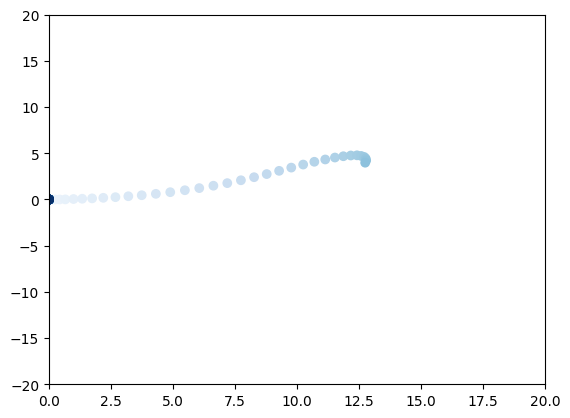

(10.776115258525369, 11228)


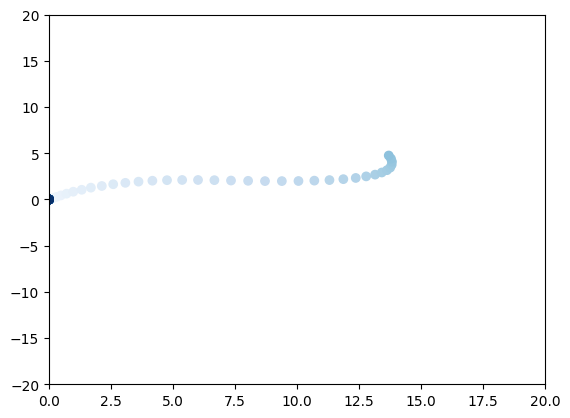

(11.089936003671722, 13288)


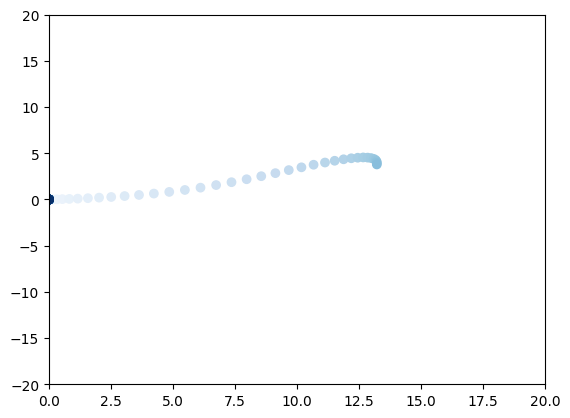

(11.30457819170069, 11130)


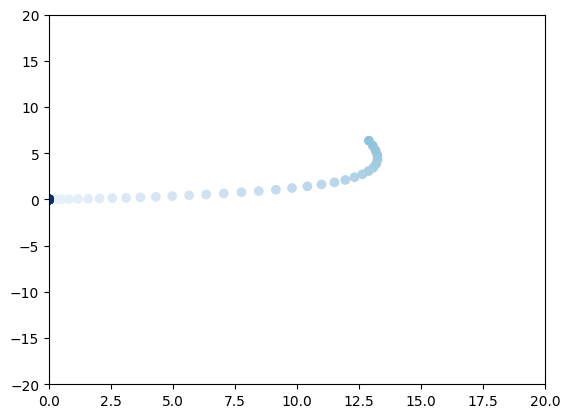

(11.401038339395416, 2334)


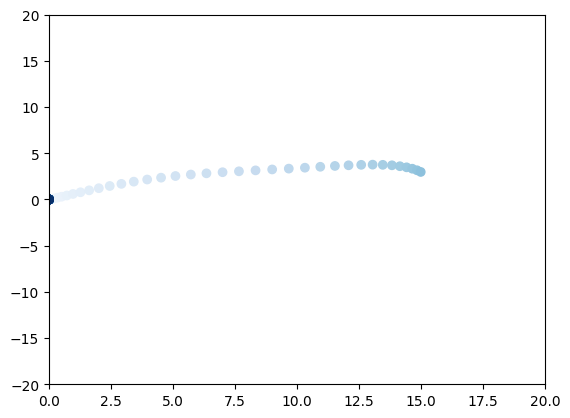

Drawing out top 5 examples for cluster center 15
(14.052965476160704, 1814)


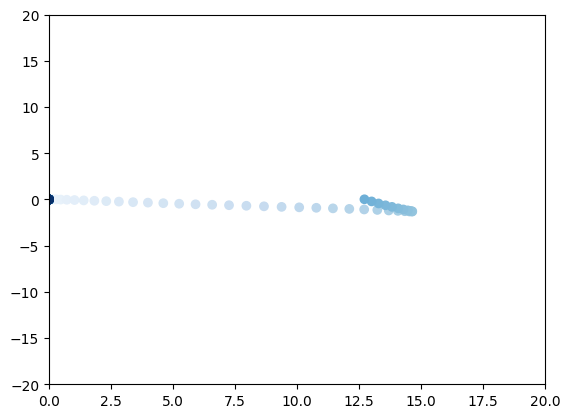

(14.96374407793866, 14716)


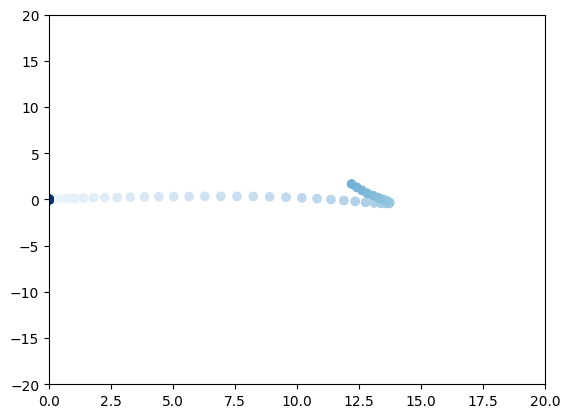

(15.162302199982332, 15750)


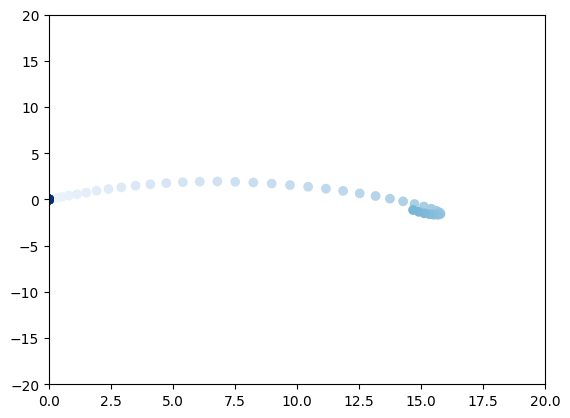

(15.74710279642284, 5531)


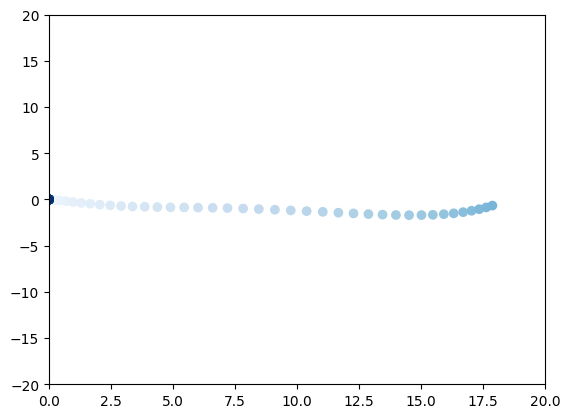

(16.453821253022273, 3109)


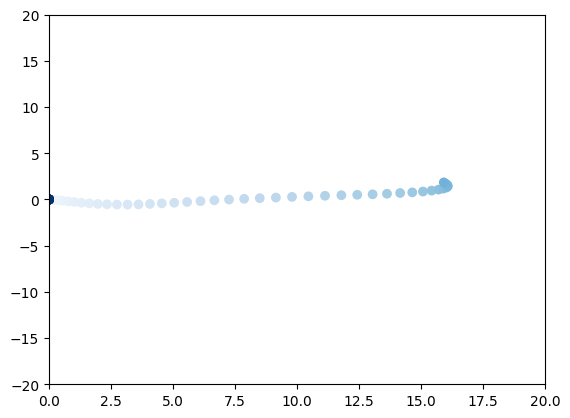

In [167]:
import matplotlib as plt
for i in range(len(sequences_ordered)):
    # displaying top 5 closest sequences to each cluster center to determine shape 
    print(f"Drawing out top 5 examples for cluster center {i}")
    cluster = sequences_ordered[i]
    for i in range(5):
        tup = cluster[i]
        print(tup)
        current_index = tup[1]
        seq = o_player_dense_transformed[current_index]
        x = [x[0] for x in seq]
        y = [x[1] for x in seq]
        c = np.linspace(0, 1, len(x))

        plt.scatter(x,y, c = c,cmap='Blues')
        plt.ylim(-20, 20)
        plt.xlim(0, 20)
        plt.show()